In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from mpl_toolkits.basemap import Basemap
import glob
import os
import shutil
import re
import cartopy
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
#
%matplotlib inline
# %matplotlib notebook
#
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, BoundaryNorm
#
# PD=os.getcwd(); PD

### Unzip a file in this directory

In [2]:
PD=os.getcwd()
fileDIR='/scratch/pk695/FACTS/002_fork/facts/JupNbk/000_pk-JupNb_TESTspace/2023-01_NZ_INSAR/000_NZ_location.lst/New_location.lst/XtractD_files_newGPS/newGPS/NZInsarGPS1_verticallandmotion_preprocess_data.tgz'
fileNME=fileDIR.split('/')[-1]
shutil.copy2(fileDIR, PD)
#
import tarfile
with tarfile.open(f'./{fileNME}', 'r:gz') as tar:
    tar.extractall()

NZInsarGPS1_verticallandmotion_preprocess_data.tgz


'/scratch/pk695/FACTS/002_fork/facts/JupNbk/000_pk-JupNb_TESTspace/NZInsarGPS1_verticallandmotion_preprocess_data.tgz'

### <font> AR6 (Greg)

In [9]:
#NZ data
filename="glaciers-ipccar6-gmipemuglaciers-ssp585_localsl.nc"
path="/projects/kopp/ar6/regional/full_sample_workflows/wf_1e/ssp585/"
fileP=(path+filename)
nz=xr.open_dataset(fileP)
nz

<xarray.Dataset>
Dimensions:           (samples: 20000, years: 9, locations: 66190)
Coordinates:
  * years             (years) int64 2020 2030 2040 2050 2060 2070 2080 2090 2100
  * locations         (locations) int64 1 2 3 ... 1018003580 1018003590
  * samples           (samples) int64 0 1 2 3 4 ... 19996 19997 19998 19999
Data variables:
    sea_level_change  (samples, years, locations) float32 ...
    lat               (locations) float64 ...
    lon               (locations) float64 ...
Attributes:
    description:  Local SLR contributions from glaciers according to GMIP2 em...
    history:      Created Mon Jun  7 16:20:39 2021
    source:       SLR Framework: AR5 workflow
    scenario:     ssp585
    baseyear:     2005

### <font> NZ run (Greg)

In [7]:
#NZ data
filename="glaciers-ipccar6-gmipemuglaciers-ssp585_localsl.nc"
path="/projects/kopp/ggg46/nz_projections/regional/full_sample_workflows/wf_1e/ssp585/"
fileP=(path+filename)
nz=xr.open_dataset(fileP)
nz


<xarray.Dataset>
Dimensions:           (samples: 20000, years: 9, locations: 7435)
Coordinates:
  * years             (years) int64 2020 2030 2040 2050 2060 2070 2080 2090 2100
  * locations         (locations) int64 0 1 2 3 4 5 ... 7430 7431 7432 7433 7434
  * samples           (samples) int64 0 1 2 3 4 ... 19996 19997 19998 19999
Data variables:
    sea_level_change  (samples, years, locations) float32 ...
    lat               (locations) float64 ...
    lon               (locations) float64 ...
Attributes:
    description:  Local SLR contributions from glaciers according to GMIP2 em...
    history:      Created Fri Aug 27 18:20:01 2021
    source:       SLR Framework: AR5 workflow
    scenario:     ssp585
    baseyear:     2005

### <font> FACTS paper

In [13]:
exp=221217   #221209  #221217
filename="coupling.ssp585.ar5AIS.ipccar5.icesheets_AIS_globalsl.nc"
path="/projects/kopp/facts-experiments/{arg0}/coupling.ssp585/output/".format(arg0=exp)
fileP=(path+filename)
nc=xr.open_dataset(fileP)
nc

<xarray.Dataset>
Dimensions:           (years: 14, samples: 2000, locations: 1)
Coordinates:
  * years             (years) int32 2020 2030 2040 2050 ... 2120 2130 2140 2150
  * samples           (samples) int64 0 1 2 3 4 5 ... 1995 1996 1997 1998 1999
  * locations         (locations) int64 -1
Data variables:
    lat               (locations) float32 ...
    lon               (locations) float32 ...
    sea_level_change  (samples, years, locations) int16 ...
Attributes:
    description:  Global SLR contribution from {} according to AR5 workflow
    history:      Created Sat Dec 17 09:06:52 2022
    source:       FACTS: coupling.ssp585.ar5AIS.ipccar5.icesheets - ssp585

### <font> NZ pk

In [ ]:
uname=os.getcwd().split("/",3)[2]
#
exp=221217   #221209  #221217
filename=""
path=""
fileP=(path+filename)
nc=xr.open_dataset(fileP)
nc

---

In [1]:
path='/scratch/pk695/FACTS/002_fork/facts/experimentsNZ/nzOG.2307/ssp119/output/'
dFILE1='ssp119.total.workflow.wf1e.global.nc'
dFILE2='ssp119.total.workflow.wf1eNOVLM.global.nc'

In [2]:
import xarray as xr
import numpy as np
d_nc1=xr.open_dataset(path+dFILE1)
d_nc2=xr.open_dataset(path+dFILE2)

In [3]:
slc1=d_nc1['sea_level_change'].values
slc2=d_nc2['sea_level_change'].values
#
time=d_nc2['years'].values
#
def ptile(slcIP):
    ptiles_50 = []
    for col in range(slcIP.shape[1]):
        column_data = slcIP[:, col, 0]
        ptile_50 = np.percentile(column_data, 50)
        ptiles_50.append(ptile_50)
    return np.array(ptiles_50)

In [4]:
slc1_50p = ptile(slc1)
slc2_50p = ptile(slc2)
slcDIF_50p = slc1_50p-slc2_50p

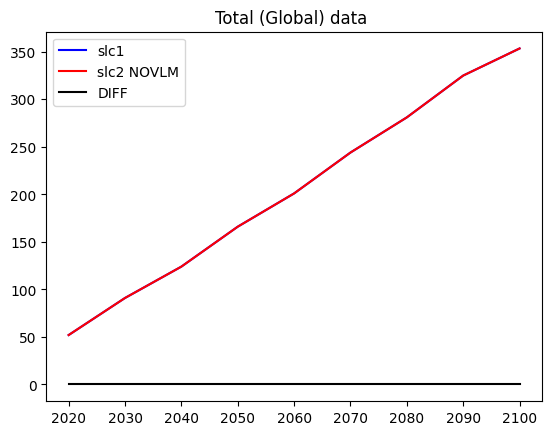

In [6]:
import matplotlib.pyplot as plt
plt.plot(time, slc1_50p, label='slc1',color='blue')
plt.plot(time, slc2_50p, label='slc2 NOVLM',color='red')
plt.plot(time, slcDIF_50p, label='DIFF',color='black')
plt.title('Total (Global) data ')
plt.legend()
plt.show()